In [1]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp2-granularity.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccstream,9,16,3,16,2022-03-15T14:17:36Z,2022-03-15T14:17:46Z,2022-03-15T14:20:11Z,2022-03-15T14:20:12Z,3m20.950559862s,6.474930
1,hpccfft,5,16,4,4,2022-03-15T14:18:36Z,2022-03-15T14:18:42Z,2022-03-15T14:25:15Z,2022-03-15T14:25:17Z,7m21.494858519s,0.577268
2,hpccfft,7,16,4,4,2022-03-15T14:18:36Z,2022-03-15T14:18:42Z,2022-03-15T14:25:12Z,2022-03-15T14:25:13Z,7m10.649468998s,0.547616
3,hpccptrans,5,16,3,3,2022-03-15T14:19:36Z,2022-03-15T14:19:47Z,2022-03-15T14:30:57Z,2022-03-15T14:30:57Z,12m9.287301279s,0.068634
4,hpccptrans,1,16,3,3,2022-03-15T14:19:36Z,2022-03-15T14:19:56Z,2022-03-15T14:30:12Z,2022-03-15T14:30:13Z,11m19.633005244s,0.068067
...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-15T14:27:05Z,2022-03-15T15:01:20Z,2022-03-15T15:09:37Z,2022-03-15T15:09:38Z,43m10.637920776s,0.341007
66,hpccptrans,9,16,4,4,2022-03-15T14:29:06Z,2022-03-15T15:01:25Z,2022-03-15T15:10:18Z,2022-03-15T15:10:18Z,41m51.091787105s,0.113924
67,hpccfft,9,16,3,3,2022-03-15T14:30:06Z,2022-03-15T15:01:23Z,2022-03-15T15:09:09Z,2022-03-15T15:09:10Z,39m39.797435298s,0.385153
68,hpccrandomaccess,0,16,4,4,2022-03-15T14:32:06Z,2022-03-15T15:02:48Z,2022-03-15T15:11:57Z,2022-03-15T15:11:57Z,40m29.655651972s,0.030711


In [2]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [3]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [4]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final
0,hpccstream,9,16,3,16,2022-03-15 14:17:36+00:00,2022-03-15 14:17:46+00:00,2022-03-15 14:20:11+00:00,2022-03-15 14:20:12+00:00,0 days 00:03:20.950559862,6.474930,0 days 00:00:10,0 days 00:02:25,0 days 00:00:01
1,hpccfft,5,16,4,4,2022-03-15 14:18:36+00:00,2022-03-15 14:18:42+00:00,2022-03-15 14:25:15+00:00,2022-03-15 14:25:17+00:00,0 days 00:07:21.494858519,0.577268,0 days 00:00:06,0 days 00:06:33,0 days 00:00:02
2,hpccfft,7,16,4,4,2022-03-15 14:18:36+00:00,2022-03-15 14:18:42+00:00,2022-03-15 14:25:12+00:00,2022-03-15 14:25:13+00:00,0 days 00:07:10.649468998,0.547616,0 days 00:00:06,0 days 00:06:30,0 days 00:00:01
3,hpccptrans,5,16,3,3,2022-03-15 14:19:36+00:00,2022-03-15 14:19:47+00:00,2022-03-15 14:30:57+00:00,2022-03-15 14:30:57+00:00,0 days 00:12:09.287301279,0.068634,0 days 00:00:11,0 days 00:11:10,0 days 00:00:00
4,hpccptrans,1,16,3,3,2022-03-15 14:19:36+00:00,2022-03-15 14:19:56+00:00,2022-03-15 14:30:12+00:00,2022-03-15 14:30:13+00:00,0 days 00:11:19.633005244,0.068067,0 days 00:00:20,0 days 00:10:16,0 days 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-15 14:27:05+00:00,2022-03-15 15:01:20+00:00,2022-03-15 15:09:37+00:00,2022-03-15 15:09:38+00:00,0 days 00:43:10.637920776,0.341007,0 days 00:34:15,0 days 00:08:17,0 days 00:00:01
66,hpccptrans,9,16,4,4,2022-03-15 14:29:06+00:00,2022-03-15 15:01:25+00:00,2022-03-15 15:10:18+00:00,2022-03-15 15:10:18+00:00,0 days 00:41:51.091787105,0.113924,0 days 00:32:19,0 days 00:08:53,0 days 00:00:00
67,hpccfft,9,16,3,3,2022-03-15 14:30:06+00:00,2022-03-15 15:01:23+00:00,2022-03-15 15:09:09+00:00,2022-03-15 15:09:10+00:00,0 days 00:39:39.797435298,0.385153,0 days 00:31:17,0 days 00:07:46,0 days 00:00:01
68,hpccrandomaccess,0,16,4,4,2022-03-15 14:32:06+00:00,2022-03-15 15:02:48+00:00,2022-03-15 15:11:57+00:00,2022-03-15 15:11:57+00:00,0 days 00:40:29.655651972,0.030711,0 days 00:30:42,0 days 00:09:09,0 days 00:00:00


In [5]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [6]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,16,2022-03-15 14:17:36+00:00,2022-03-15 14:17:46+00:00,2022-03-15 14:20:11+00:00,2022-03-15 14:20:12+00:00,0 days 00:03:20.950559862,6.474930,0 days 00:00:10,0 days 00:02:25,0 days 00:00:01,2022-03-15 14:17:36+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-15 14:18:36+00:00,2022-03-15 14:18:42+00:00,2022-03-15 14:25:15+00:00,2022-03-15 14:25:17+00:00,0 days 00:07:21.494858519,0.577268,0 days 00:00:06,0 days 00:06:33,0 days 00:00:02,2022-03-15 14:17:36+00:00,0 days 00:01:00
2,hpccfft,7,16,4,4,2022-03-15 14:18:36+00:00,2022-03-15 14:18:42+00:00,2022-03-15 14:25:12+00:00,2022-03-15 14:25:13+00:00,0 days 00:07:10.649468998,0.547616,0 days 00:00:06,0 days 00:06:30,0 days 00:00:01,2022-03-15 14:17:36+00:00,0 days 00:01:00
3,hpccptrans,5,16,3,3,2022-03-15 14:19:36+00:00,2022-03-15 14:19:47+00:00,2022-03-15 14:30:57+00:00,2022-03-15 14:30:57+00:00,0 days 00:12:09.287301279,0.068634,0 days 00:00:11,0 days 00:11:10,0 days 00:00:00,2022-03-15 14:17:36+00:00,0 days 00:02:00
4,hpccptrans,1,16,3,3,2022-03-15 14:19:36+00:00,2022-03-15 14:19:56+00:00,2022-03-15 14:30:12+00:00,2022-03-15 14:30:13+00:00,0 days 00:11:19.633005244,0.068067,0 days 00:00:20,0 days 00:10:16,0 days 00:00:01,2022-03-15 14:17:36+00:00,0 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-15 14:27:05+00:00,2022-03-15 15:01:20+00:00,2022-03-15 15:09:37+00:00,2022-03-15 15:09:38+00:00,0 days 00:43:10.637920776,0.341007,0 days 00:34:15,0 days 00:08:17,0 days 00:00:01,2022-03-15 14:17:36+00:00,0 days 00:09:29
66,hpccptrans,9,16,4,4,2022-03-15 14:29:06+00:00,2022-03-15 15:01:25+00:00,2022-03-15 15:10:18+00:00,2022-03-15 15:10:18+00:00,0 days 00:41:51.091787105,0.113924,0 days 00:32:19,0 days 00:08:53,0 days 00:00:00,2022-03-15 14:17:36+00:00,0 days 00:11:30
67,hpccfft,9,16,3,3,2022-03-15 14:30:06+00:00,2022-03-15 15:01:23+00:00,2022-03-15 15:09:09+00:00,2022-03-15 15:09:10+00:00,0 days 00:39:39.797435298,0.385153,0 days 00:31:17,0 days 00:07:46,0 days 00:00:01,2022-03-15 14:17:36+00:00,0 days 00:12:30
68,hpccrandomaccess,0,16,4,4,2022-03-15 14:32:06+00:00,2022-03-15 15:02:48+00:00,2022-03-15 15:11:57+00:00,2022-03-15 15:11:57+00:00,0 days 00:40:29.655651972,0.030711,0 days 00:30:42,0 days 00:09:09,0 days 00:00:00,2022-03-15 14:17:36+00:00,0 days 00:14:30


In [7]:
df['benchmark'].unique()

array(['hpccstream', 'hpccfft', 'hpccptrans', 'hpccrandomringbw',
       'hpccrandomringlat', 'hpccdgemm', 'hpccrandomaccess'], dtype=object)

In [8]:
df['nWorkers'].unique()

array([16,  4,  3,  1,  2])

#  performance

In [17]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [18]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccstream,16,3,16,4.917390,3.434709
1,hpccstream,16,2,16,4.211447,1.007119
2,hpccstream,16,1,16,3.386670,0.797554
0,hpccfft,16,4,4,0.620372,0.082815
0,hpccfft,16,1,1,5.812247,4.835245
0,hpccfft,16,2,2,-0.029268,0.970732
0,hpccfft,16,3,3,0.363080,0.022073
0,hpccptrans,16,3,3,1.867344,3.105637
0,hpccptrans,16,1,1,3.152190,4.152190
0,hpccptrans,16,2,2,1.387967,1.723442


    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccstream      16       3        16         4.917390        3.434709
1  hpccstream      16       2        16         4.211447        1.007119
2  hpccstream      16       1        16         3.386670        0.797554
  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0   hpccfft      16       4         4         0.620372        0.082815
0   hpccfft      16       1         1         5.812247        4.835245
0   hpccfft      16       2         2        -0.029268        0.970732
0   hpccfft      16       3         3         0.363080        0.022073
    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccptrans      16       3         3         1.867344        3.105637
0  hpccptrans      16       1         1         3.152190        4.152190
0  hpccptrans      16       2         2         1.387967        1.723442
0  hpccptrans      16       4         4         0.113924     

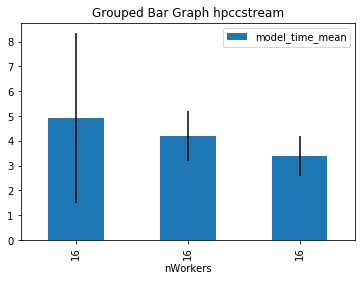

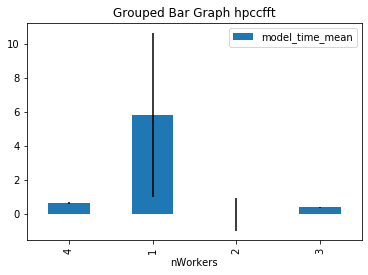

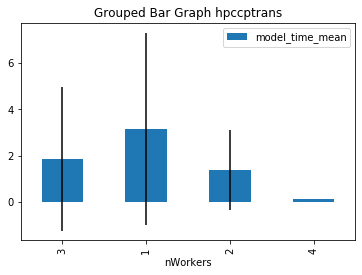

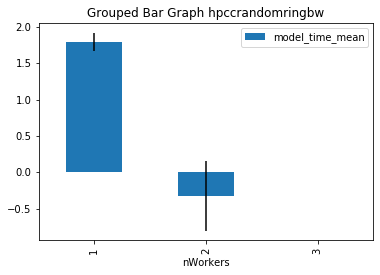

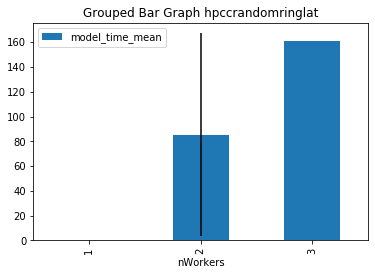

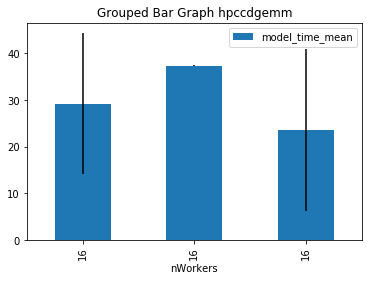

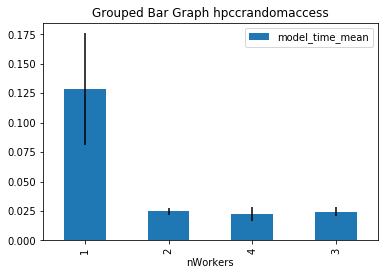

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [20]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [21]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccstream,16,3,16,0 days 00:08:53,0 days 00:10:32.830941089,0 days 00:02:17.500000,0 days 00:00:10.641898326,0 days 00:00:01.250000,0 days 00:00:00.433012701,0 days 00:11:55.378527911,0 days 00:10:28.493117127
1,hpccstream,16,2,16,0 days 00:15:07,0 days 00:06:04.211477029,0 days 00:02:06.666666666,0 days 00:00:10.873004286,0 days 00:00:00.666666666,0 days 00:00:00.471404520,0 days 00:18:04.398080620,0 days 00:06:01.200364026
2,hpccstream,16,1,16,0 days 00:27:26,0 days 00:05:09.532981549,0 days 00:02:14.333333333,0 days 00:00:06.128258770,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:30:30.789071195,0 days 00:05:16.838754745
0,hpccfft,16,4,4,0 days 00:04:21,0 days 00:06:00.624458405,0 days 00:05:42,0 days 00:01:10.014284256,0 days 00:00:01,0 days 00:00:00.816496580,0 days 00:10:42.615867416,0 days 00:04:52.130461929
0,hpccfft,16,1,1,0 days 00:14:42,0 days 00:03:31.030803438,0 days 00:01:23.666666666,0 days 00:00:03.681787005,0 days 00:00:00.666666666,0 days 00:00:00.471404520,0 days 00:16:41.568324657,0 days 00:03:35.043135845
0,hpccfft,16,2,2,0 days 00:17:51.500000,0 days 00:08:05.500000,0 days 00:04:17,0 days 00:00:18,0 days 00:00:00,0 days 00:00:00,0 days 00:22:52.267415513,0 days 00:08:23.359391445
0,hpccfft,16,3,3,0 days 00:32:46,0 days 00:01:29,0 days 00:08:01.500000,0 days 00:00:15.500000,0 days 00:00:01,0 days 00:00:00,0 days 00:41:25.217678037,0 days 00:01:45.420242739
0,hpccptrans,16,3,3,0 days 00:04:39.750000,0 days 00:07:39.149961886,0 days 00:09:05.250000,0 days 00:02:25.240102933,0 days 00:00:00.250000,0 days 00:00:00.433012701,0 days 00:14:27.589593390,0 days 00:05:16.113367370
0,hpccptrans,16,1,1,0 days 00:19:42,0 days 00:01:50,0 days 00:01:32.500000,0 days 00:00:00.500000,0 days 00:00:01,0 days 00:00:00,0 days 00:21:50.307013851,0 days 00:01:47.714609523
0,hpccptrans,16,2,2,0 days 00:24:53,0 days 00:04:39.374300893,0 days 00:04:44,0 days 00:02:20.847435191,0 days 00:00:00,0 days 00:00:00,0 days 00:30:13.673301423,0 days 00:06:46.870454071


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

NameError: name 'df_time' is not defined

In [27]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nTasks in df_bench.nTasks.unique():
            df_senario = df_bench[df_bench.nTasks == nTasks]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_sum' : sum(x['init'].dt.total_seconds()),
                'run_sum' : sum(x['run'].dt.total_seconds()),
                'final_sum' : sum(x['final'].dt.total_seconds()),
                'duration_sum' : sum(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time.append(df_senario)

In [28]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum
0,hpccstream,16,9791.0,1333.0,8.0,11607.075567
0,hpccfft,16,9504.0,2754.0,7.0,12647.522763
0,hpccptrans,16,9901.0,3751.0,3.0,14043.084093
0,hpccrandomringbw,16,10240.0,1173.0,8.0,11784.740777
0,hpccrandomringlat,16,10240.0,1173.0,8.0,11784.740777
0,hpccdgemm,16,6485.0,2370.0,4.0,9312.766877
0,hpccrandomaccess,16,11550.0,2788.0,5.0,14737.631126


<ipython-input-29-1521fc477d73>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



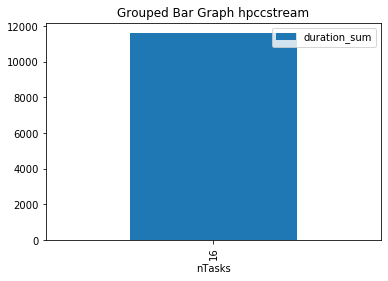

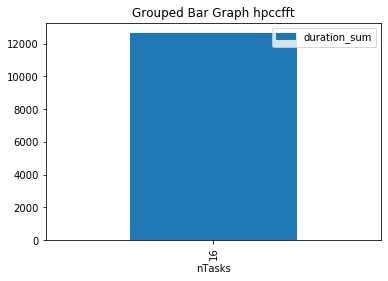

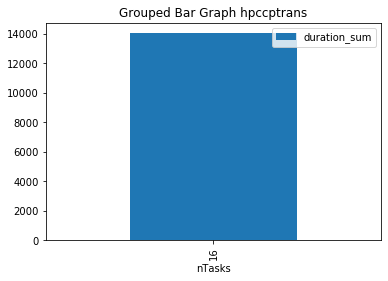

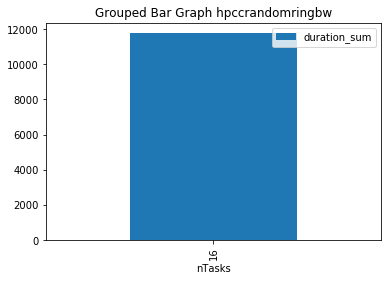

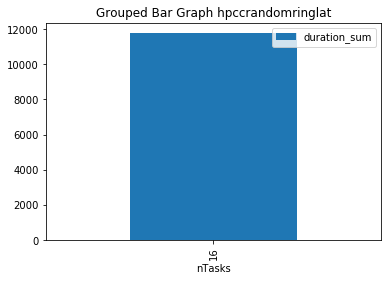

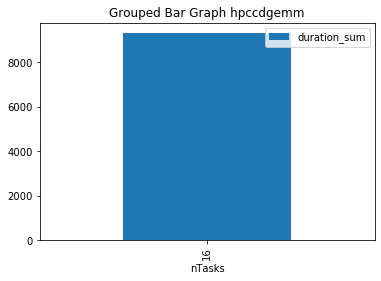

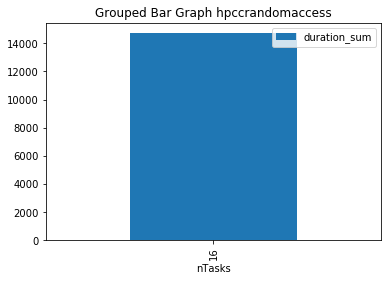

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [30]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,16,2022-03-15 14:17:36+00:00,2022-03-15 14:17:46+00:00,2022-03-15 14:20:11+00:00,2022-03-15 14:20:12+00:00,0 days 00:03:20.950559862,6.474930,0 days 00:00:10,0 days 00:02:25,0 days 00:00:01,2022-03-15 14:17:36+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-15 14:18:36+00:00,2022-03-15 14:18:42+00:00,2022-03-15 14:25:15+00:00,2022-03-15 14:25:17+00:00,0 days 00:07:21.494858519,0.577268,0 days 00:00:06,0 days 00:06:33,0 days 00:00:02,2022-03-15 14:17:36+00:00,0 days 00:01:00
2,hpccfft,7,16,4,4,2022-03-15 14:18:36+00:00,2022-03-15 14:18:42+00:00,2022-03-15 14:25:12+00:00,2022-03-15 14:25:13+00:00,0 days 00:07:10.649468998,0.547616,0 days 00:00:06,0 days 00:06:30,0 days 00:00:01,2022-03-15 14:17:36+00:00,0 days 00:01:00
3,hpccptrans,5,16,3,3,2022-03-15 14:19:36+00:00,2022-03-15 14:19:47+00:00,2022-03-15 14:30:57+00:00,2022-03-15 14:30:57+00:00,0 days 00:12:09.287301279,0.068634,0 days 00:00:11,0 days 00:11:10,0 days 00:00:00,2022-03-15 14:17:36+00:00,0 days 00:02:00
4,hpccptrans,1,16,3,3,2022-03-15 14:19:36+00:00,2022-03-15 14:19:56+00:00,2022-03-15 14:30:12+00:00,2022-03-15 14:30:13+00:00,0 days 00:11:19.633005244,0.068067,0 days 00:00:20,0 days 00:10:16,0 days 00:00:01,2022-03-15 14:17:36+00:00,0 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-15 14:27:05+00:00,2022-03-15 15:01:20+00:00,2022-03-15 15:09:37+00:00,2022-03-15 15:09:38+00:00,0 days 00:43:10.637920776,0.341007,0 days 00:34:15,0 days 00:08:17,0 days 00:00:01,2022-03-15 14:17:36+00:00,0 days 00:09:29
66,hpccptrans,9,16,4,4,2022-03-15 14:29:06+00:00,2022-03-15 15:01:25+00:00,2022-03-15 15:10:18+00:00,2022-03-15 15:10:18+00:00,0 days 00:41:51.091787105,0.113924,0 days 00:32:19,0 days 00:08:53,0 days 00:00:00,2022-03-15 14:17:36+00:00,0 days 00:11:30
67,hpccfft,9,16,3,3,2022-03-15 14:30:06+00:00,2022-03-15 15:01:23+00:00,2022-03-15 15:09:09+00:00,2022-03-15 15:09:10+00:00,0 days 00:39:39.797435298,0.385153,0 days 00:31:17,0 days 00:07:46,0 days 00:00:01,2022-03-15 14:17:36+00:00,0 days 00:12:30
68,hpccrandomaccess,0,16,4,4,2022-03-15 14:32:06+00:00,2022-03-15 15:02:48+00:00,2022-03-15 15:11:57+00:00,2022-03-15 15:11:57+00:00,0 days 00:40:29.655651972,0.030711,0 days 00:30:42,0 days 00:09:09,0 days 00:00:00,2022-03-15 14:17:36+00:00,0 days 00:14:30


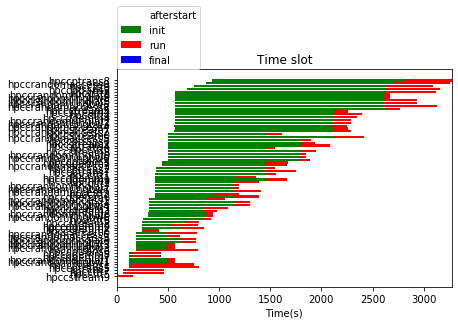

In [31]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
